In [63]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import yaml

import utils.pytorch_util as ptu
from utils.base.dataloader import loading_data
from src import vae

In [64]:
train_loader, test_loader = loading_data(
    'data', 32, 64,
)
device = ptu.set_gpu_mode(False, 1)

Using CPU


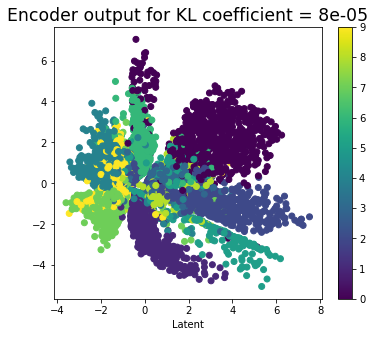

In [65]:
with open("exp_specs/predict2.yaml", "r") as spec_file:
    spec_string = spec_file.read()
    exp_specs = yaml.load(spec_string, Loader=yaml.Loader)
model = torch.load("logs/benchmark--model-VAE--data-MNIST--img_size-32/VAE/vae_train--alpha-8e-05--dim-2/seed-111/model.pt").to(device)
plt.figure(figsize=(6, 5))

for i, batches in enumerate(test_loader):
    imgs = batches[0].to(device)
    labels = batches[1]
    latent = model.predict(imgs).detach().numpy()
    y = torch.zeros(latent.shape[0], latent.shape[1])
    if exp_specs["latent_dim"] == 1:
        plt.scatter(latent, y, c=labels)
    elif exp_specs["latent_dim"] == 2:
        plt.scatter(latent[:, 0], latent[:, 1], c=labels)
plt.colorbar()
plt.xlabel("Latent")
plt.ylabel("")
plt.title(f'Encoder output for KL coefficient = {exp_specs["alpha"]}', fontdict={'fontsize': 'xx-large'})
plt.savefig("image/dim2/encoder_output_alpha_{}.pdf".format(exp_specs["alpha"]), bbox_inches='tight', dpi=400)